# Kaggle Korea 대회!!!

[캐글 코리아](https://www.facebook.com/groups/KaggleKoreaOpenGroup/)에서 2019년에 주최했던 캐글 경진대회인 **2019 2nd ML Month with KaKR**를 직접 따라해봅시다.

시작하기에 앞서, 필요한 라이브러리들을 설치해주세요!

```bash
$ conda install -c conda-forge xgboost
$ conda install -c conda-forge lightgbm
$ conda install -c conda-forge missingno
```

> What is Kaggle?

- [이전 포스트 : Kaggle이란?](https://butter-shower.tistory.com/128?category=716065)

![img](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdQYJdY%2FbtqE9cA7W0V%2Fj6RKaRkzexpyPjnsCWLRx1%2Fimg.png)

캐글은 2010년에 만들어진 예측모델 및 데이터 분석 대회 플랫폼입니다. Competition도 많이 올라오고, Data만 따로 올라오기도 해요. 데이터를 분석해서 만든 예측 모델을 test 데이터를 통해 정확도를 확인할 수도 있는 사이트입니다.

최근에 가입자가 500만명이 넘었다고 합니다. 굉장히 데이터 사이언티스트들에게는 핫한 플랫폼이죠!

## 대회를 시작해봅시다

그럼 이제 대회를 참가해봅시다. 아래 링크를 클릭해서 우리가 참가할 대회 페이지를 살펴봅시다.

- [캐글 코리아와 함께하는 2nd ML 대회 - House Price Prediction](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr)

대회에 참가하기 위해선 로그인이 필요합니다. Google 계정을 통한 회원가입이 가능하니 어렵지 않게 가입하실 수 있습니다.



### 대회를 한번 살펴볼까요?

- evaluation은 RMSE로 한다고 합니다. 수치형 데이터겠네요.
    - RMSE(Root Mean Square Error) : 평균 제곱근 오차. 실제값들과 예측값들의 오차를 평균내고 그것을 제곱근 한 것입니다.
- 수치형 데이터니, 회귀 문제가 되겠습니다.
- Prize는 지났네요! 기준은 약간 특이합니다.
    - 상위 리더보드 100명 (대회가 마무리된 후 사용한 소스코드를 커널 항목에 공개해야하는 의무가 있습니다.)
    - 커널 Vote를 가장 많이 받은 상위 10팀
    - 튜터들이 뽑은 좋은 분석이 담긴 커널을 만든 10팀
    - 이렇게 총 120팀!
- End Date는 이미 지났습니다. 2019년 4월 22일까지였네요!
- Rules에는 몇가지 규칙이 있습니다.
    - 개인 참가입니다
    - 한 참가자당 한개의 캐글 계정을 가지고 참여해야 합니다.
    - **외부 데이터 사용을 금지합니다.**
    - 하루 최대 제출 횟수만큼인 5번만 제출할 수 있습니다.


### 데이터를 한번 살펴봅시다.

**Data Fields**

- ID : 집을 구분하는 번호
- date : 집을 구매한 날짜
- price : 집의 가격(Target variable)
- bedrooms : 침실의 수
- bathrooms : 화장실의 수
- sqft_living : 주거 공간의 평방 피트(면적)
- sqft_lot : 부지의 평방 피트(면적)
- floors : 집의 층 수
- waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
- view : 집이 얼마나 좋아 보이는지의 정도
- condition : 집의 전반적인 상태
- grade : King County grading 시스템 기준으로 매긴 집의 등급
- sqft_above : 지하실을 제외한 평방 피트(면적)
- sqft_basement : 지하실의 평방 피트(면적)
- yr_built : 지어진 년도
- yr_renovated : 집을 재건축한 년도
- zipcode : 우편번호
- lat : 위도
- long : 경도
- sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
- sqft_lot15 : 2015년 기준 부지의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)

이번 대회는 칼럼에 대한 설명이 매우 친절합니다. 우리의 **target data는 `price`** 가 되겠네요. 


## Baseline을 따라가봅시다.

kaggle 라이브러리를 설치해서 데이터를 다운로드할 수 있습니다.

```bash
$ pip install kaggle
$ kaggle competitions download -c 2019-2nd-ml-month-with-kakr
```

그냥 직접 [링크](https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/data)에 들어가서 다운로드 받아도 됩니다. 

다운받은 파일은 `./data/kaggle` 폴더에 넣어줍니다.


---

시작하기에 앞서, 캐글 코리아에서는 주최자 차원에서 [Baseline](https://www.kaggle.com/kcs93023/2019-ml-month-2nd-baseline)을 제공했습니다. 베이스라인이라 함은 기본적으로 문제를 해결할 때 쉽게 사용해볼 수 있는 샘플을 이야기합니다. 

한번 이 베이스 라인을 따라가봅시다.

In [3]:
# 필요한 모듈들을 import 해줍시다.
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data_path = os.path.dirname(os.path.abspath('__file__'))
train_data_path = data_path + r'/data/kaggle/train.csv'
test_data_path = data_path + r'/data/kaggle/test.csv'

data = pd.read_csv(train_data_path)
sub = pd.read_csv(test_data_path)
print("train data : {}".format(data.shape))
print("sub : {}".format(sub.shape))

train data : (15035, 21)
sub : (6468, 20)


In [22]:
# target 데이터는 따로 빼줍니다.
y = data['price']
del data['price']

In [23]:
# test와 train 데이터를 같이 전처리 해주기위해 합쳐줍니다.
train_len = len(data)
data = pd.concat((data, sub), axis=0)

In [24]:
print(len(data))
data.head(10)

21503


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


## 데이터 전처리하기

각 변수들에 대해 한번 알아봅시다. 먼저 각 변수들에 대한 결측 유무를 확인해봅시다.

### 결측치 확인

`missingno` 라이브러리의 matrix 함수를 사용하면 데이터의 결측 상태를 시각화를 통해 살펴볼 수 있습니다.

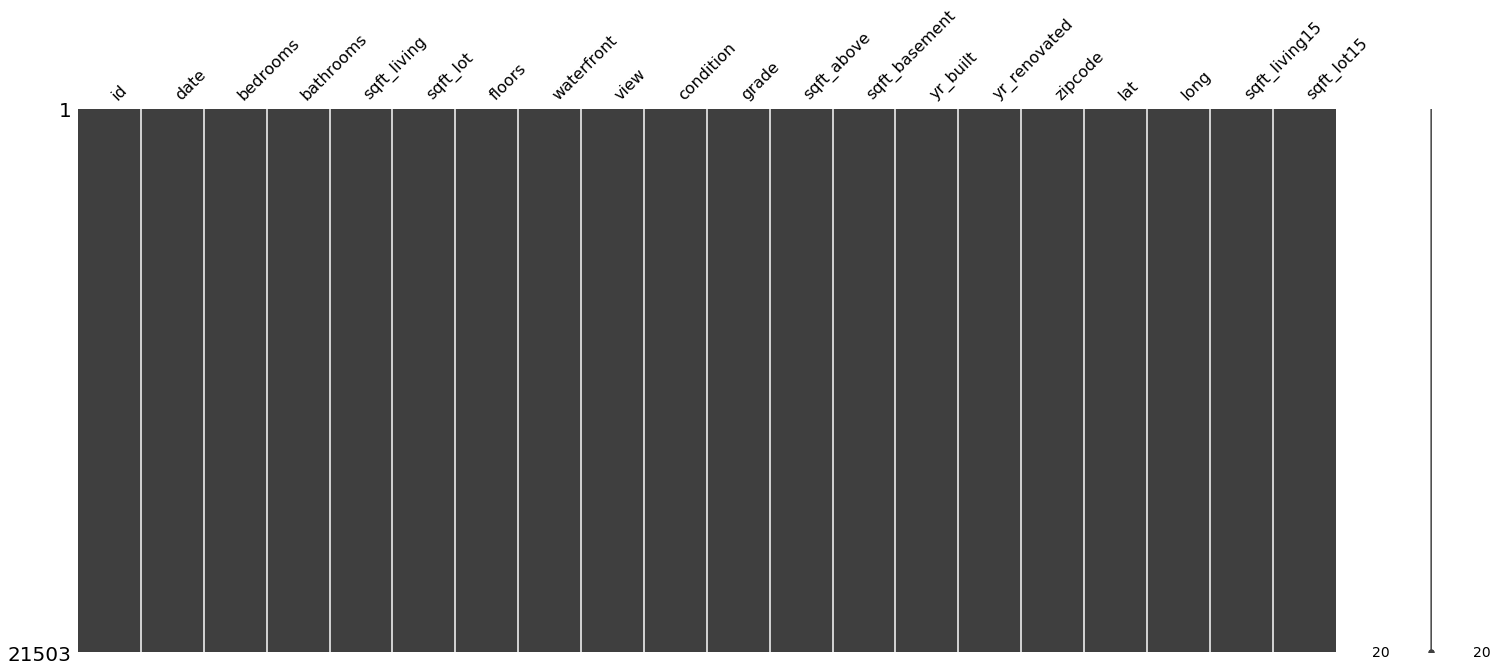

In [25]:
import missingno as msno
msno.matrix(data)

결측치가 없습니다! 그대로 넘어가도 괜찮겠네요.

### id, date 변수 정리

id는 모델이 집값을 예측하는데 도움을 주지 않으므로 제거합니다.
date 변수는 *연월일시간*으로 값을 가지고 있는데, 연월만 고려하는 **범주형 변수**로 만들겠습니다.

In [26]:
# id 제거
sub_id = data['id'][train_len:]
del data['id']

In [27]:
#연, 월만 고려하도록
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str)

### 각 변수들의 분포 확인

한쪽으로 치우친 분포는 모델이 결과를 예측하기에 좋지 않은 영향을 미치므로 다듬어줍시다.

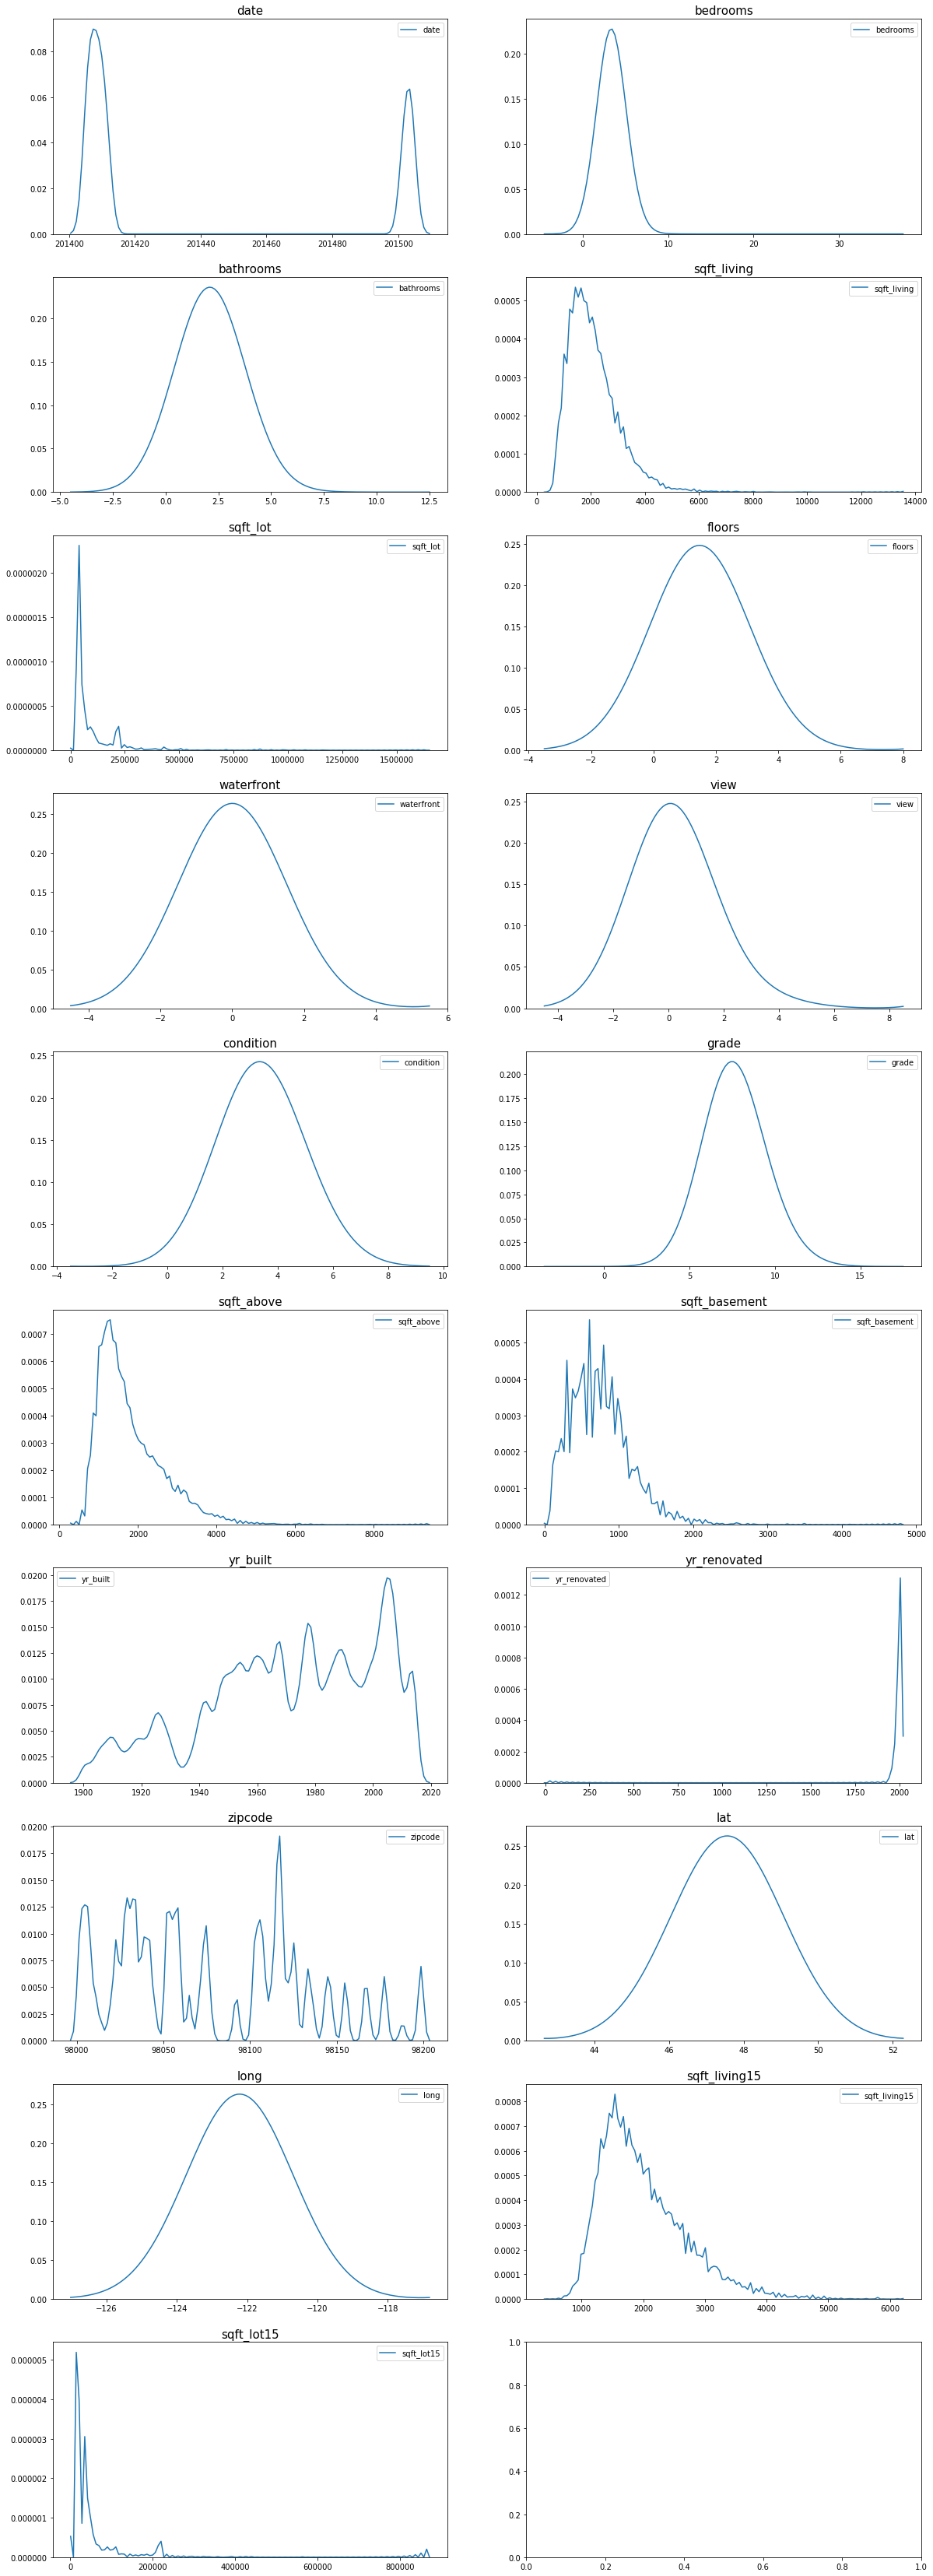

In [31]:
import seaborn as sns

fig, ax = plt.subplots(10, 2, figsize = (20, 60))

# id 변수는 제외하고 분포를 확인합니다.
count = 0
columns = data.columns

for row in range(10):
    for col in range(2):
        sns.kdeplot(data[columns[count]], bw = 1.5, ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19:
            break

그래프의 분포를 보면 어떤 처리를 해주면 좋을지 떠올릴 수 있습니다.

위 그래프 중에서는 bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement 변수가 한쪽으로 치우친 경향을 보이는군요.

이렇게 한 쪽으로 치우친 분포의 경우에는 **로그 변환(log-scaling)** 을 통해 데이터 분포를 정규분포에 가깝게 만들 수 있습니다. 자세한 이유는 아래에서 다시 다루고, 우선 결과부터 살펴봅시다.

아래와 같이 치우친 컬럼들을 `skew_columns` 리스트 안에 담고, 모두 `np.log1p()`를 활용해서 로그 변환을 해주도록 하겠습니다. `numpy.log1p()` 함수는 입력 배열의 각 요소에 대해 <u>자연로그 log(1 + x)을 반환해 주는 함수</u>입니다.

In [32]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

변환을 해주었습니다. 다시 한번 분포를 확인해봅시다.

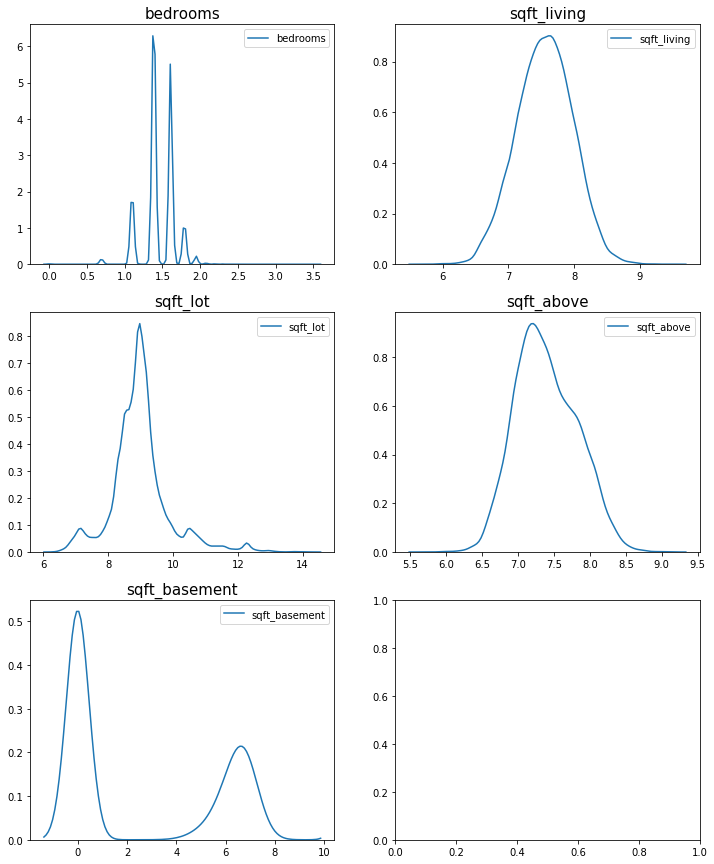

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

이전보다 훨씬 치우침이 줄어든 분포를 확인할 수 있습니다.

**그렇다면 왜 로그 변환은 분포의 치우침을 줄어들게 만드는 걸까요?**

이는 로그 함수의 형태를 보면 알 수 있습니다. 아래의 일반적인 로그 함수를 살펴봅시다.

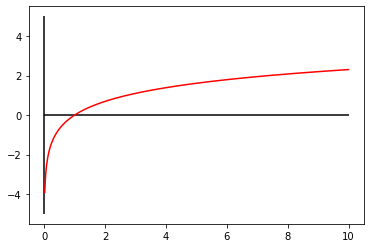

In [35]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

위와 같은 로그 함수의 특징은 다음과 같습니다.

- 0<x<1 범위에서는 기울기가 매우 가파릅니다. 즉, x의 구간은 (0,1)로 매우 짧은 반면, y의 구간은 (−∞,0)으로 매우 큽니다.
- 따라서 0에 가깝게 모여있는 값들이 x로 입력되면, 그 함수값인 y 값들은 매우 큰 범위로 벌어지게 됩니다. 즉, 로그 함수는 0에 가까운 값들이 조밀하게 모여있는 입력값을, 넓은 범위로 펼칠 수 있는 특징을 가집니다.
- 반면, x값이 점점 커짐에 따라 로그 함수의 기울기는 급격히 작아집니다. 이는 곧 큰 x값들에 대해서는 y값이 크게 차이나지 않게 된다는 뜻이고, 따라서 넓은 범위를 가지는 x를 비교적 작은 y값의 구간 내에 모이게 하는 특징을 가집니다.

위와 같은 특성 때문에 한 쪽으로 몰려있는 분포에 로그 변환을 취하게 되면 넓게 퍼질 수 있는 것이죠.

왜 한쪽으로 치우친 분포를 로그 변환을 취하게 되면 정규분포 모양으로 고르게 분포하게 될 수 있는지 이해가 되시나요?

그렇다면 우리가 맞추어야 할 타겟인 집의 가격, 즉 `data[price]`의 분포를 로그 변환했을 때 결과를 유추해봅시다.

원래 price의 분포는 다음과 같습니다.

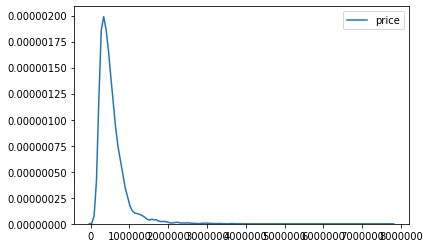

In [36]:
sns.kdeplot(y)
plt.show()

위 분포를 로그변환 해봅시다.

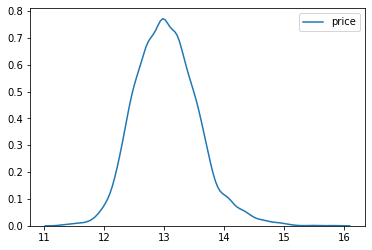

In [37]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

정규분포에 가까운 모양이 됩니다. 

---

그럼 여기까지 로그변환이 필요한 데이터에 대한 처리를 마무리 해보았으니 다시 전쳋 데이터를 나누어줍니다.

위에서 저장해두었던 `train_len`을 인덱스로 활용해서 학습데이터와 테스트 데이터를 분리해줍시다.

In [38]:
sub = data.iloc[train_len:]
x = data.iloc[:train_len]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


### Baseline - 모델 설계

#### 모델링

이제 본격적으로 학습시킬 모델을 준비합니다. Baseline 커널에서는 여러 가지 모델을 함께 사용해서 결과를 섞는, **블렌딩(blending)** 이라는 기법을 활용합니다.

블렌딩이란 하나의 개별 모델을 사용하는 것이 아니라 다양한 여러 모델을 종합하여 결과를 얻는 기법입니다. <br/>
블렌딩은 **앙상블 기법**이라고 하기도 하는데요, 자세한 내용을 다음 포스팅에서 살짝 읽어보겠습니다.

- [Part 1. Introduction to Ensemble Learning](https://subinium.github.io/introduction-to-ensemble-1/#:~:text=%EC%95%99%EC%83%81%EB%B8%94(Ensemble)%20%ED%95%99%EC%8A%B5%EC%9D%80%20%EC%97%AC%EB%9F%AC,%EB%A5%BC%20%EA%B0%80%EC%A7%80%EA%B3%A0%20%EC%9D%B4%ED%95%B4%ED%95%98%EB%A9%B4%20%EC%A2%8B%EC%8A%B5%EB%8B%88%EB%8B%A4)

앙상블은 강력한 개별 모델 하나보다 약한 여러개 모델의 결과를 합치는 것이 낫다는 기본 전제로부터 시작됩니다. 

우리는 회귀 문제를 풀고 있으므로, 예측 결과를 평균을 내어 활용할 예정입니다. 여러가지 모델의 결과를 산술평균 하여 블렌딩 모델을 만들겠습니다.

모델은 부스팅 계열인 `gboost`, `xgboost`, `lightgbm` 세가지를 사용하겠습니다.

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [40]:
gboost = GradientBoostingRegressor(random_state = 2020)
xgboost = xgb.XGBRegressor(random_state = 2020)
lightgbm = lgb.LGBMRegressor(random_state = 2020)

models = [
    {'model' : gboost, 'name' : 'GradientBoosting'},
    {'model' : xgboost, 'name' : 'XGBoost'},
    {'model' : lightgbm, 'name' : 'LightGBM'}
]

#### Cross Validation

<u>교차검증</u>을 통해 모델의 성능을 간단히 평가하겠습니다.

In [45]:
from sklearn.model_selection import KFold, cross_val_score

def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2020).get_n_splits(x.values)
    for m in models:
        print("Model {} CV Score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), kf = kfold))

In [46]:
get_cv_score(models)

Model GradientBoosting CV Score : 0.8608
Model XGBoost CV Score : 0.8861
Model LightGBM CV Score : 0.8819


#### Submission File 만들기

cross_val_score() 함수는 회귀 모델을 전달할 경우 R^2 점수를 반환합니다.

R^2은 1에 가까울수록 모델이 잘 학습되었다는 것을 나타냅니다.

위의 결과를 보니 3개 트리 모델이 모두 훈련 데이터에 대해 괜찮은 성능을 보여주고 있군요.

Baseline 모델에서는 다음과 같이 여러 모델을 입력하면 각 모델에 대한 예측 결과를 평균내어 주는 `AgeragingBlending()` 함수를 만들어 사용합니다. `AgeragingBlending()` 함수는 models 딕셔너리 안에 있는 모델을 모두 x와 y로 학습시킨 뒤 predictions에 그 예측 결과값을 모아서 평균한 값을 반환합니다.

In [47]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

이제 함수를 활용해서 예측값을 생성해봅시다.

In [48]:
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

적당한 실수값들로 나타낸 것 같습니다. 이제 이 결과들을 캐글에 제출해봅시다.

제출해야하는 csv 파일 샘플이 바로 `data` 폴더에 있는 `sample_submission.csv` 입니다. 

한번 `sample_submission.csv` 파일을 확인해봅시다.

In [52]:
submission_path = os.path.dirname(os.path.abspath('__file__'))
submission_path = os.path.join(submission_path, 'data/kaggle/sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


`id`와 `price` 두가지 열로 구성되어 있습니다. 이에 맞게 우리도 `id`와 `price` 로 구성된 데이터 프레임을 만들어줍시다.

In [53]:
result = pd.DataFrame({
    'id' : sub_id,
    'price' : y_pred
})

result.head(10)

,id,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05
5,15040,3.055065e+05
6,15041,4.348250e+05
7,15042,6.760498e+05
8,15043,2.793095e+05
9,15044,4.643196e+05


이제 제출만 남았습니다. submission.csv 파일을 만들어 줍시다.

In [54]:
submission_path = os.path.dirname(os.path.abspath('__file__'))
submission_path += r'/data/kaggle/submission.csv'

try:
    result.to_csv(submission_path, index=False)
    print("File Save Success!!")
except:
    print("File Save Fail!")

File Save Success!!


이 파일을 이제 submit 하면 됩니다. 그런데 baseline을 따라간것뿐이니, 제대로 데이터가 나오지 않겠죠? ㅎㅎ;;


<br/>

---

# 내 입맛대로 데이터를 준비해봅시다.

이제 랭킹을 올려봅시다. 아직 우리는 모델을 하나도 건드려보지 않았어요. 전처리도 제대로 하지 않았고요. 

이번엔 주도적으로 데이터를 다뤄봅시다. 처음으로 다시 돌아가서! 데이터를 가져와봅시다.

In [58]:
data_dir = os.path.dirname(os.path.abspath('__file__')) + r'/data/kaggle/'

train_data_path = data_dir + 'train.csv'
test_data_path = data_dir + 'test.csv'

In [59]:
train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

In [60]:
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


먼저 우리는 date를 처리해줍시다. 

Baseline 커널과 단리 우리는 int형 데이터로 처리해보겠습니다. 이렇게 하면 모델이 date도 예측을 위한 특성으로 파악할수도 있겠죠?

In [61]:
train['date'] = train['date'].apply(lambda i : i[:6]).astype(int)
train.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,201504,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,201405,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,201405,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,201410,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,201503,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


baseline과 마찬가지로 price 칼럼은 따로 빼줍시다.

`y` 변수에 `price`를 넣어주고 train에서 삭제하겠습니다.

In [62]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


`id` 칼럼도 삭제해줍시다.

In [63]:
del train['id']
print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


test 데이터에서도 같은 작업을 진행해줍니다.

In [64]:
test['date'] = test['date'].apply(lambda i : i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


그렇다면 타겟 데이터인 y를 한번 확인해봅시다.

In [65]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

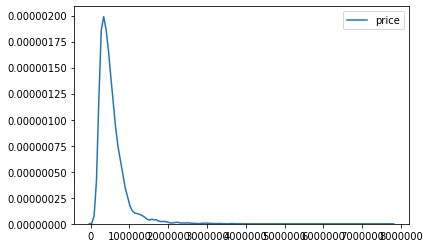

In [66]:
sns.kdeplot(y)

price는 왼쪽으로 크게 치우쳐 있습니다.

이번엔 y를 한번 `np.log1p()` 함수를 통해 로그변환을 해주고 나중에 모델이 예측한 후에 다시 `np.exp1m()`을 활용해서 되돌려줍시다. `np.exp1m()`은 `np.log1p()`과는 반대로 각 원소 x마다 exp(x)-1의 값을 반환해줍니다.

In [67]:
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

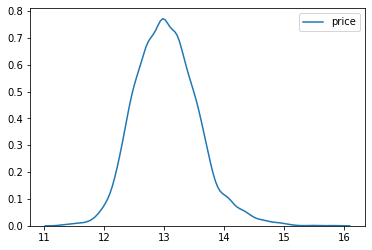

In [68]:
sns.kdeplot(y)
plt.show()

비교적 완만한 정규분포의 형태로 잘 변환되었습니다.

train의 전체 자료형을 한번 확인해봅시다.

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

모두 실수 혹은 정수 자료형이네요. 문제없이 모델 학습에 활용할 수 있을 것 같습니다.

### 반복되는 작업들을 쉽게 할 함수를 만들어요.

보다 다양한 실험을 하기 위해 여러 함수를 미리 만들어봅시다.

#### RMSE 계산

사이킷런에 내장되어있는 `mean_square_error`를 가져와 RMSE를 계산해봅시다.

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [72]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

4가지 모델을 가져왔습니다!!

In [73]:
# random_state는 모델초기화나 데이터셋 구성에 사용되는 랜덤 시드값입니다. 
#random_state=None    # 이게 초기값입니다. 아무것도 지정하지 않고 None을 넘겨주면 모델 내부에서 임의로 선택합니다.  
random_state=2020        # 하지만 우리는 이렇게 고정값을 세팅해 두겠습니다. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [75]:
# 각 모델의 이름은 다음과 같이 클래스의 __name__ 속성에 접근해서 얻을 수 있습니다.
gboost.__class__.__name__

'GradientBoostingRegressor'

In [76]:
# 모델이 주어지면 rmse를 구하는 함수를 만들어봅시다.
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(
            train, y, random_state=random_state,
            test_size = 0.2
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_pred, y_test)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
        
    return score_df

In [77]:
get_scores(models, train, y)

,RMSE
GradientBoostingRegressor,128360.196497
RandomForestRegressor,125576.039323
LGBMRegressor,111920.367359
XGBRegressor,110318.637918



### 하이퍼 파라미터도 튜닝을 해봅시다. 그리드 탐색!

이제 모델과 데이터셋이 있다면 RMSE 결과값을 나타내주는 함수가 준비되었으니 다양한 하이퍼 파라미터로 실험하는 일만 남았습니다.

실험은 `sklearn.model_selection` 라이브러리 안에 있는 `GridSearchCV` 클래스를 활용합니다. 

In [78]:
from sklearn.model_selection import GridSearchCV

> Grid Search가 뭔가요?

![img](https://aiffelstaticprd.blob.core.windows.net/media/images/e-10-miro.max-800x600.png)

Grid Search는 탐색할 하이퍼 파라미터를 Grid(격자)와 같이 정해놓고 탐색하는 방법입니다. 사람이 먼저 탐색할 하이퍼 파라미터의 값을 정해두면, 그 값들로 만들어질 수 있는 모든 조합을 탐색합니다. <u>특정 값에 대한 하이퍼 파라미터 조합을 모두 탐색하고자 할 때 유리</u>합니다.


---

다양한 파라미터를 입력하면 가능한 모든 조합을 탐색하는 사이킷런의 `GridSearchCV`를 활용할 것입니다. 

먼저 `GridSearchCV`에 입력되는 인자들은 다음과 같습니다.

- `param_grid` : 탐색할 파라미터의 종류 (딕셔너리로 입력)
- `scoring` : 모델의 성능을 평가할 지표
- `cv` : cross validation을 수행하기 위해 train 데이터셋을 나누는 조각의 개수
- `verbose` : 그리드 탐색을 진행하면서 진행 과정을 출력해서 보여줄 메세지의 양 (숫자가 클수록 더 많은 메세지를 출력합니다.)
- `n_jobs` : 그리드 탐색을 진행하면서 사용할 CPU의 개수

그러면 `param_grid`에 탐색할 xgboost 관련 하이퍼 파라미터를 넣어서 준비하겠습니다.

In [79]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

그 다음으로 모델을 준비합니다. 모델은 LightGBM(lgbm)를 사용해봅시다.

In [80]:
model = LGBMRegressor(random_state=random_state)

그러면 `model`, `param_grid`와 함께 다른 여러 가지 인자를 넣어서 `GridSearchCV`를 수행할 수 있습니다!

다음과 같이 GridSearchCV를 이용해서 `grid_model` 모델을 초기화하고, `train`과 `y` 데이터로 모델을 간단히 학습시키면 `param_grid` 내의 모든 하이퍼 파라미터의 조합에 대해 실험이 완료됩니다.

In [81]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=2020,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_s

위에 `totalling 20 fits`는 어떻게 해서 20인걸가요?

- 위에서 입력한 param_grid에 n_estimators 두가지, max_depth 두가지를 넣었으므로 가능한 조합은 총 2x2=4가지입니다.
- 또한 cross validation은 각 경우마다 5번을 진행하니 총 20fits를 진행하게 됩니다.


자, grid_model.fit 함수를 통해서 4가지 조합에 대한 실험을 모두 마쳤습니다.

실험에 대한 결과는 다음과 같이 `grid_model.cv_results_` 안에 저장됩니다.

In [82]:
grid_model.cv_results_

{'mean_fit_time': array([0.05134215, 0.04146004, 0.1259758 , 0.20115738]),
 'std_fit_time': array([0.01441415, 0.00117038, 0.00444558, 0.00613585]),
 'mean_score_time': array([0.00369339, 0.00494905, 0.00662837, 0.00940437]),
 'std_score_time': array([0.00031218, 0.00026099, 0.00019125, 0.00060054]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

너무 많은 정보들이 나와요. 원하는 정보들만 뽑아봅시다.

파라미터 조합은 위 딕셔너리 중 `params`에, 각각에 대한 테스트 점수는 `mean_test_score`에 저장되어 있습니다.

이 두 정보만 빼내어 봅시다.

In [83]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [84]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [85]:
results = pd.DataFrame(params)
results['score'] = score

results

,max_depth,n_estimators,score
0,1,50,-0.073394
1,1,100,-0.055020
2,10,50,-0.029177
3,10,100,-0.027027


좋습니다.

그런데 한가지 의문점이 있습니다. 왜 score는 음수인걸까요?

그 이유는 바로 `GridSearchCV`을 초기화한 코드에 힌트가 있습니다. 우리가 `grid_model`을 초기화 할 때 `scoring` 인자에 **`neg_mean_squared_error`** 를 입력했기 때문이에요. 이는 *MSE에 음수를 취한 값*입니다.

`GridSearchCV`를 사용할 때에는 이 외에도 다양한 점수 체계(scoring)를 사용할 수 있습니다. 그에 대한 정보는 다음 페이지에서 확인하겠습니다.

- [사이킷런 - The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

그럼 간단하게 RMSE 점수로 변환해 봅시다.<br/>
음수로 된 MSE 였으니, -1을 곱해주고 `np.sqrt` 로 루트 연산을 해주면 되겠습니다.

In [86]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,max_depth,n_estimators,score,RMSE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


하지만 아직도 위에서 보았던 10만 단위의 RMSE와는 값의 크기가 아주 다른 것 같습니다.

그 이유는 `price`에 있습니다. 위에서 우리는 price의 분포가 한쪽으로 치우쳐져 있는 것을 보고 *log 변환*을 했었죠.

그 후 rmse 값을 계산하기 위한 함수에서는 np.expm1 함수를 활용해 다시 원래대로 복원한 후 RMSE 값을 계산했습니다.

<br/>

하지만 그리드 탐색을 하면서는 `np.expm1()`으로 변환하는 과정이 없었기 때문에 log 변환되어 있는 price 데이터에서 손실함수값을 계산한 것이죠.

따라서 사실, 위의 데이터 프레임에 나타난 값은 정확히 말하면 RMSE가 아니라 <u>RMSLE, 즉 Root Mean Squared Log Error</u> 입니다.

log를 취한 값에서 RMSE를 구했다는 뜻이죠!

<br/>

이에 맞게 컬럼의 이름을 RMSLE로 변환해주도록 하겠습니다. 판다스에서 컬럼의 이름 변환은 `rename`으로 할 수 있습니다.

In [87]:
results = results.rename(columns={'RMSE': 'RMSLE'})
results

,max_depth,n_estimators,score,RMSLE
0,1,50,-0.073394,0.270914
1,1,100,-0.055020,0.234564
2,10,50,-0.029177,0.170814
3,10,100,-0.027027,0.164399


In [89]:
# RMSLE가 낮은 순서대로 정렬해줍시다.
results.sort_values('RMSLE')

,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


복잡한 과정이었습니다. 지금까지 그리드탐색을 수행하고 그 결과를 깔끔하게 확인했습니다! 이 과정을 하나의 함수로 만들어서 앞으로는 간결한 코드로 진행하겠습니다.

In [90]:
"""
다음과 같은 과정을 진행할 수 있는 `my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)` 함수를 구현해 보세요.

1. GridSearchCV 모델로 `model`을 초기화합니다.
2. 모델을 fitting 합니다.
3. params, score에 각 조합에 대한 결과를 저장합니다. 
4. 데이터 프레임을 생성하고, RMSLE 값을 추가한 후 점수가 높은 순서로 정렬한 `results`를 반환합니다.
"""

# 코드 입력
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV 모델로 초기화
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # 모델 fitting
    grid_model.fit(train, y)

    # 결과값 저장
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # 데이터 프레임 생성
    results = pd.DataFrame(params)
    results['score'] = score

    # RMSLE 값 계산 후 정렬
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

이제 실험에 대한 준비는 모두 끝났습니다! 실험을 통해 좋은 결과를 내는 모델을 찾았다면 제출을 해봐야겠죠.
제출 과정 또한 하나의 함수로 깔끔하게 진행하겠습니다.

먼저 위에서 만들어놓은 `my_GridSearch()` 함수로 간단한 그리드 탐색을 해보겠습니다.

In [91]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  20 out of  20 | elapsed:    0.8s finished


,max_depth,n_estimators,score,RMSLE
3,10,100,-0.027027,0.164399
2,10,50,-0.029177,0.170814
1,1,100,-0.055020,0.234564
0,1,50,-0.073394,0.270914


가장 좋은 조합은 `max_depth=10`, `n_estimators=100` 이군요.
해당 모델로 학습을 해서 예측값인 `submission.csv` 파일을 만들어서 제출해보겠습니다.

## 하이퍼 파라미터를 설정하고 모델을 만들어봅시다.

먼저 해당 파라미터로 구성된 모델을 준비하고, 학습 후 예측 결과를 생성합니다.



In [92]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([13.13580793, 13.08051399, 14.11202067, ..., 13.01592878,
       12.69894979, 12.96297768])

앗, 예측 결과에 `np.expm1()`을 씌워서 다시 원래 스케일로 되돌리는 것도 잊으면 안 되겠죠!

In [93]:
prediction = np.expm1(prediction)
prediction

array([ 506766.66784595,  479506.10405112, 1345155.15609376, ...,
        449515.92243642,  327402.87855805,  426332.71354302])

이제 위에서 했던대로 `sample_submission.csv` 파일을 가져와보겠습니다. 데이터프레임을 만들고 우리의 모델이 예측한 값을 덮어씌우면 제출할 데이터가 완성되겠습니다.



In [95]:
submission_path = data_path + r'/data/kaggle/sample_submission.csv'
submission = pd.read_csv(submission_path)

In [96]:
submission.head()

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000


In [97]:
# price 데이터를 덮어줍시다.
submission['price'] = prediction
submission.head()

,id,price
0,15035,5.067667e+05
1,15036,4.795061e+05
2,15037,1.345155e+06
3,15038,3.122579e+05
4,15039,3.338645e+05


이제 이 데이터를 csv 파일로 저장하겠습니다.

단, 앞으로 많은 실험이 있을 예정이니 파일 이름에 모델의 종류와 위에서 확인했던 RMSE 값을 넣어주면 제출 파일들이 깔끔하게 관리될 것입니다.

In [98]:
data_path += r'/data/kaggle'
submission_csv_path = '{}/submission_{}_RMSLSE_{}.csv'.format(data_path, 'lgbm', '0.1649')

submission.to_csv(submission_csv_path, index=False)

위의 과정들도 하나의 함수로 만들어버립시다.

In [99]:
"""
아래의 과정을 수행하는 `save_submission(model, train, y, test, model_name, rmsle)` 함수를 구현해주세요.
1. 모델을 `train`, `y`로 학습시킵니다.
2. `test`에 대해 예측합니다.
3. 예측값을 `np.expm1`으로 변환하고, `submission_model_name_RMSLE_100000.csv` 형태의 `csv` 파일을 저장합니다.
"""

# 코드 작성
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

---

## 마무리

마지막으로 submission 파일도 만들어보았습니다. 자 이제 직접 다양한 하이퍼 파라미터를 튜닝하며 최적의 조합을 찾아봅시다.

물론 캐글에서 성적 또는 모델의 성능을 최대화 하기 위한 방법에는 하이퍼 파라미터 튜닝만 있는 것이 아닙니다.

예를 들자면 EDA 과정을 통해 불필요한 피처를 골라내거나 적절하게 피처를 수정할 수 있습니다.

### 튜닝해볼 수 있는 모델 클래스 인자

대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

- `max_depth` : 의사 결정 나무의 깊이, 정수 사용
- `learning_rate` : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
- `n_estimators` : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
- `num_leaves` : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
- `boosting_type` : 부스팅 방식, gbdt, rf 등의 문자열 입력

위에서 저는 `n_estimators`와 `max_depth` 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

- [lightGBM / XGBoost 파라미터 설명](http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/)
- [Chapter 4. 분류 - LightGBM](https://injo.tistory.com/48)

위의 자료 외에도 `lightgbm`, `xgboost 하이퍼 파라미터 튜닝` 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 `my_GridSearch()`, `save_submission()` 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!


### 시도해볼 수 있는 방법

이번 시간에는 다루지 않았지만, 시도해볼 수 있는 방법은 아래와 같습니다.

- 피처 엔지니어링
- 하이퍼 파라미터 튜닝하기
- baseline 커널에서 활용했던 블렌딩 방법 활용하기

또한 끝난 대회이기때문에, 많은 참가자들이 올려놓은 커널도 있습니다.

- <https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks>



In [101]:
from IPython.core.display import display, HTML

display(HTML("<style> .container{width:90% !important;}</style>"))